# Predicting Mumbai House Prices: A Machine Learning Project

Welcome to my interactive Jupyter Notebook project, where we embark on a journey to predict house prices in the bustling city of Mumbai. In this project, we'll explore the intricacies of Mumbai's real estate market and build a machine learning model to predict house prices based on various features.

## Aim of the Project

The aim of this project is to leverage the power of data science and machine learning to predict house prices in Mumbai. Through a comprehensive approach, we'll work towards the following objectives:

1. **Data Exploration**: We'll start by exploring the dataset, understanding the features, and visualizing patterns and relationships. This initial analysis will lay the foundation for our modeling efforts.

2. **Feature Engineering**: We'll carefully select and preprocess features that are most relevant for predicting house prices. This may include transforming categorical data, handling missing values, and scaling numerical features.

3. **Model Selection**: We'll delve into various regression models suited for predicting continuous numerical values. We'll explore models like Linear Regression, Decision Trees, Random Forests, and potentially more advanced models like Gradient Boosting.

4. **Model Evaluation**: We'll evaluate the performance of our models using appropriate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). This will help us select the best-performing model.

5. **Feature Importance**: We'll analyze feature importance to understand which factors have the most significant impact on house prices according to our model.

6. **Prediction and Insights**: We'll deploy our trained model to make price predictions on new data. Additionally, we'll provide insights into factors that potential buyers and sellers should consider when dealing with Mumbai's dynamic real estate market.

7. **Interactive Learning**: This interactive Jupyter Notebook is designed to engage you in the data science journey. You can explore visualizations, understand model decisions, and gain insights into predicting house prices.

By the end of this notebook, you'll have a functioning machine learning model that can predict house prices in Mumbai. Whether you're a real estate enthusiast, a buyer, or someone intrigued by data science, this project will provide valuable insights into Mumbai's real estate landscape.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Mumbai House Prices.csv")
data=df.copy()
df

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New
...,...,...,...,...,...,...,...,...,...
76033,3,Apartment,Parinee Liva Roca,1527,7.00,Cr,Juhu,Ready to move,Unknown
76034,5,Apartment,Parinee Liva Roca,3049,12.00,Cr,Juhu,Ready to move,Unknown
76035,4,Apartment,Lodha Seaview,3313,10.00,Cr,Napeansea Road,Ready to move,Unknown
76036,2,Apartment,Hubtown Serene,1305,4.25,Cr,Bandra East,Ready to move,Unknown


## Dataset Columns Overview

- **bhk**: Represents the number of bedrooms, hall, and kitchen in a property. It indicates the configuration and size of the property.

- **type**: Describes the type of property, such as "Apartment," "Villa," "Studio Apartment," "Independent House," or "Penthouse."

- **locality**: Specifies the region or area in Mumbai where the property is located. The locality can impact the property's desirability and convenience.

- **area**: Represents the size of the property in square feet. The area is an important factor in determining a property's price.

- **price**: Indicates the price of the property. The price is influenced by various factors like location, size, amenities, and demand.

- **price_unit**: Denotes the unit of currency used for property prices. "Cr" stands for crore, and "L" stands for lakh.

- **region**: Refers to the specific region or neighborhood in Mumbai where the property is situated. Different regions offer distinct amenities and lifestyles.

- **status**: Specifies whether the property is "Ready to move" or "Under Construction." This impacts the timeline for occupancy.

- **age**: Indicates the age or condition of the property. It can be "New" (recently constructed), "Resale" (previously owned), or "Unknown" (age information missing).


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.2+ MB


In [4]:
df.isnull().sum()

bhk           0
type          0
locality      0
area          0
price         0
price_unit    0
region        0
status        0
age           0
dtype: int64

In [5]:
def price_convert(row):
    if row["price_unit"]=="L":
        return int(row["price"]*100000)
    elif row["price_unit"]=="Cr":
        return int(row["price"]*10000000)

In [6]:
df["house_price"]=df.apply(price_convert, axis=1)

In [7]:
df

,bhk,type,locality,area,price,price_unit,region,status,age,house_price
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New,25000000
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New,5251000
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New,17300000
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New,5998000
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New,9411000
...,...,...,...,...,...,...,...,...,...,...
76033,3,Apartment,Parinee Liva Roca,1527,7.00,Cr,Juhu,Ready to move,Unknown,70000000
76034,5,Apartment,Parinee Liva Roca,3049,12.00,Cr,Juhu,Ready to move,Unknown,120000000
76035,4,Apartment,Lodha Seaview,3313,10.00,Cr,Napeansea Road,Ready to move,Unknown,100000000
76036,2,Apartment,Hubtown Serene,1305,4.25,Cr,Bandra East,Ready to move,Unknown,42500000


In [8]:
df.drop(["price","price_unit"], axis=1, inplace=True)
df

,bhk,type,locality,area,region,status,age,house_price
0,3,Apartment,Lak And Hanware The Residency Tower,685,Andheri West,Ready to move,New,25000000
1,2,Apartment,Radheya Sai Enclave Building No 2,640,Naigaon East,Under Construction,New,5251000
2,2,Apartment,Romell Serene,610,Borivali West,Under Construction,New,17300000
3,2,Apartment,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,5998000
4,2,Apartment,Origin Oriana,659,Mira Road East,Under Construction,New,9411000
...,...,...,...,...,...,...,...,...
76033,3,Apartment,Parinee Liva Roca,1527,Juhu,Ready to move,Unknown,70000000
76034,5,Apartment,Parinee Liva Roca,3049,Juhu,Ready to move,Unknown,120000000
76035,4,Apartment,Lodha Seaview,3313,Napeansea Road,Ready to move,Unknown,100000000
76036,2,Apartment,Hubtown Serene,1305,Bandra East,Ready to move,Unknown,42500000


In [9]:
pd.options.display.float_format='{:,.2f}'.format
df.describe()

,bhk,area,house_price
count,"76,038.00","76,038.00","76,038.00"
mean,2.02,"1,024.54","16,841,779.52"
std,0.92,670.28,"21,766,551.15"
min,1.00,127.00,"449,000.00"
25%,1.00,640.00,"6,400,000.00"
50%,2.00,872.00,"11,000,000.00"
75%,3.00,"1,179.00","19,400,000.00"
max,10.00,"16,000.00","600,000,000.00"


# EXPLORATORY DATA ANALYSIS

<Figure size 1000x800 with 0 Axes>

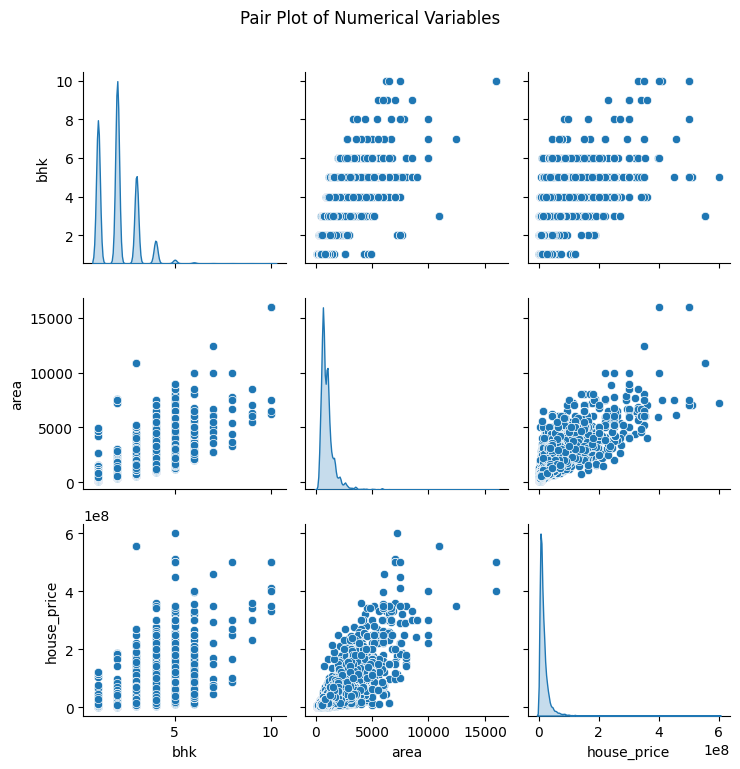

In [10]:
custom_palette = sns.color_palette("husl")

plt.figure(figsize=(10, 8))
pairplot = sns.pairplot(data=df, palette=custom_palette, diag_kind="kde")
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.tight_layout()
plt.show()

The pair plot reveals a pronounced linear trend among the variables, suggesting a strong correlation. This could might be able to support the use of linear regression for predictive analysis.

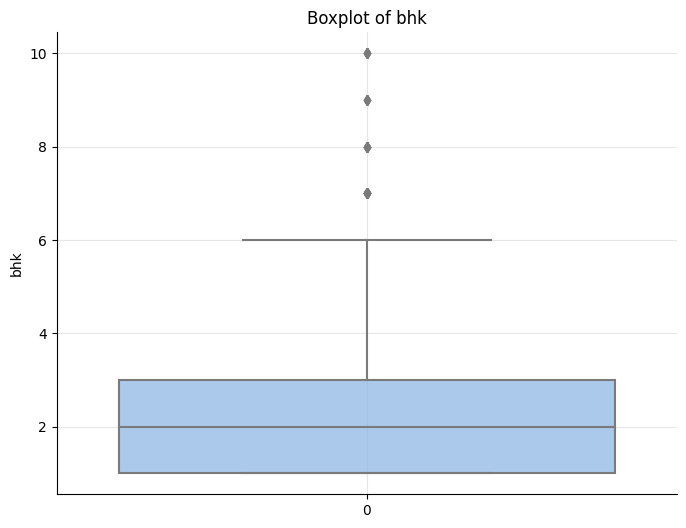

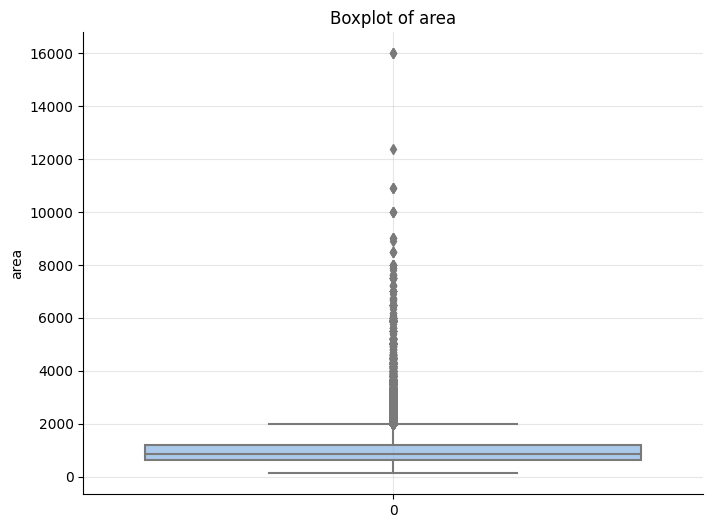

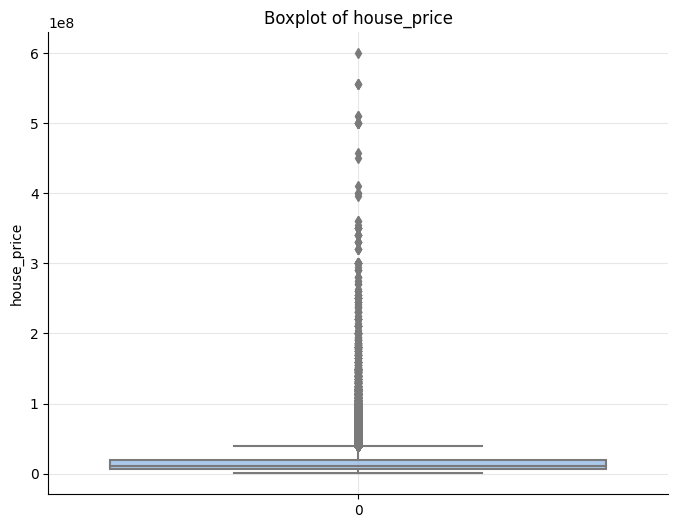

In [11]:
custom_palette = sns.color_palette("pastel")

numeric_columns = df.select_dtypes(include="number")

for i in numeric_columns:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(data=numeric_columns[i], palette=custom_palette)
    plt.ylabel(i)
    plt.title(f"Boxplot of {i}")
    sns.despine()
    plt.grid(True, alpha=0.3)
    plt.show()

Both 'area' and 'house price' exhibit a notable number of outliers, indicating significant deviations from the main data distribution and potentially influencing model performance.

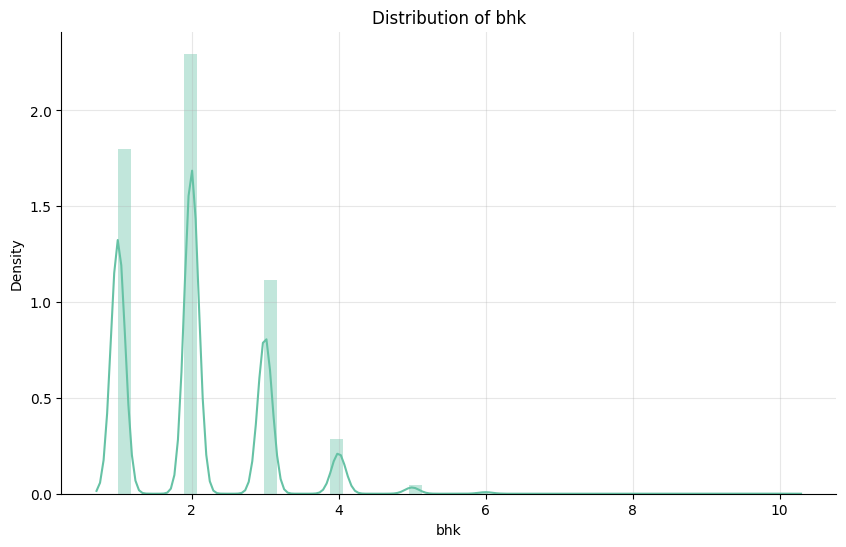

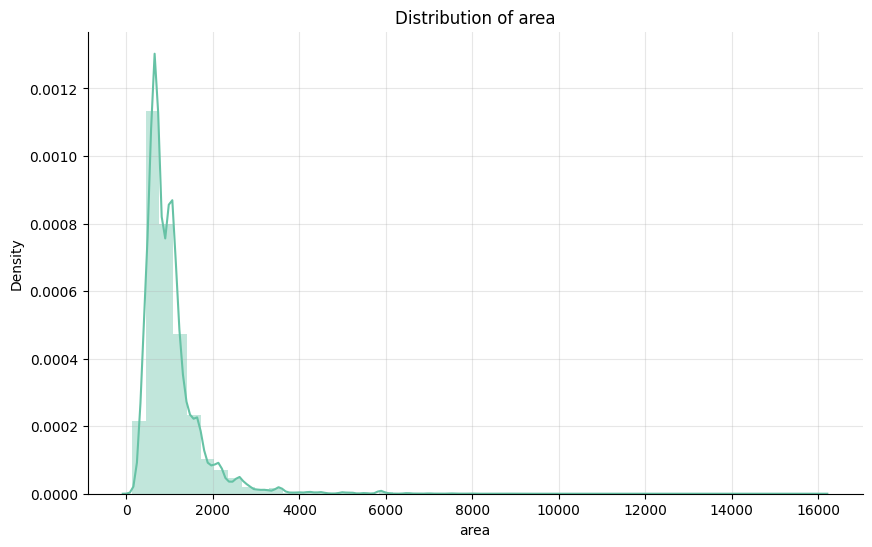

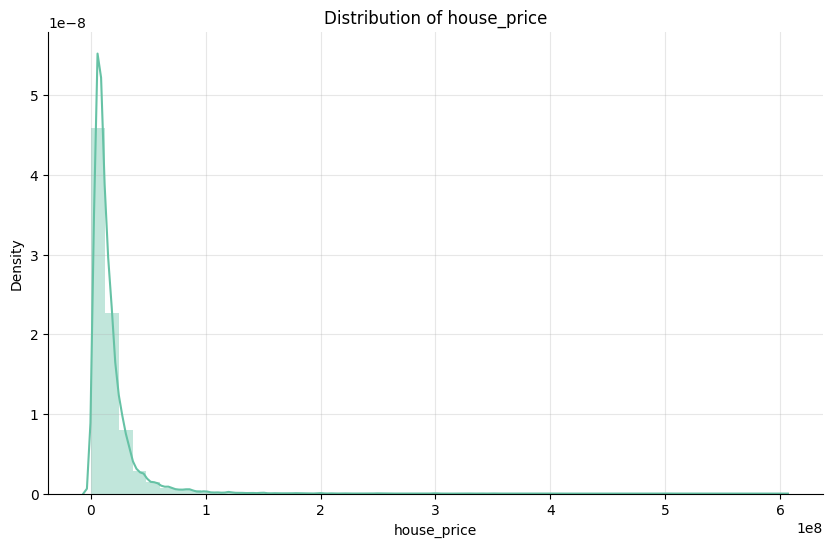

In [12]:
custom_palette = sns.color_palette("Set2")

for i in df.select_dtypes(include="number"):
    plt.figure(figsize=(10, 6))
    sns.distplot(df[i], color=custom_palette[0], kde=True)
    plt.xlabel(i)
    plt.ylabel("Density")
    plt.title(f"Distribution of {i}")
    plt.grid(True, alpha=0.3)
    sns.despine()
    plt.show()

The distributions of 'house price,' 'area,' and 'bhk' are right-skewed, signifying that the majority of data points cluster towards lower values while a few instances with much higher values extend the tail of the distribution to the right.

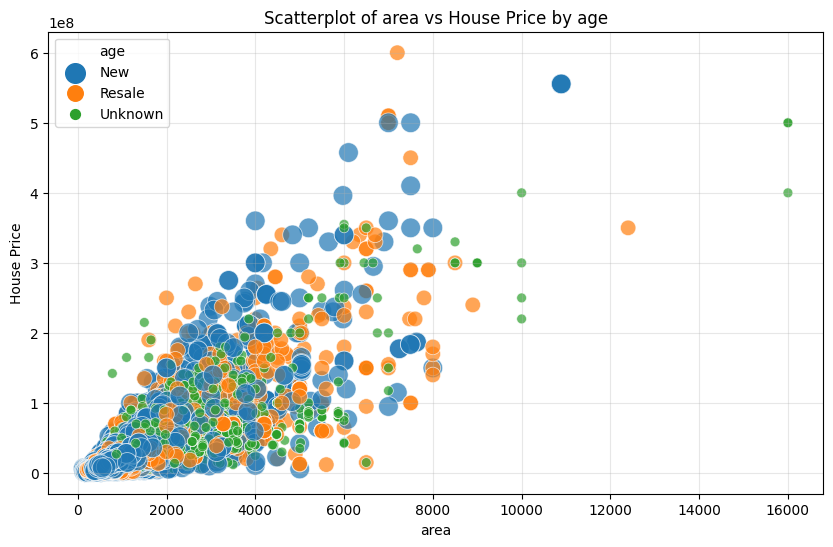

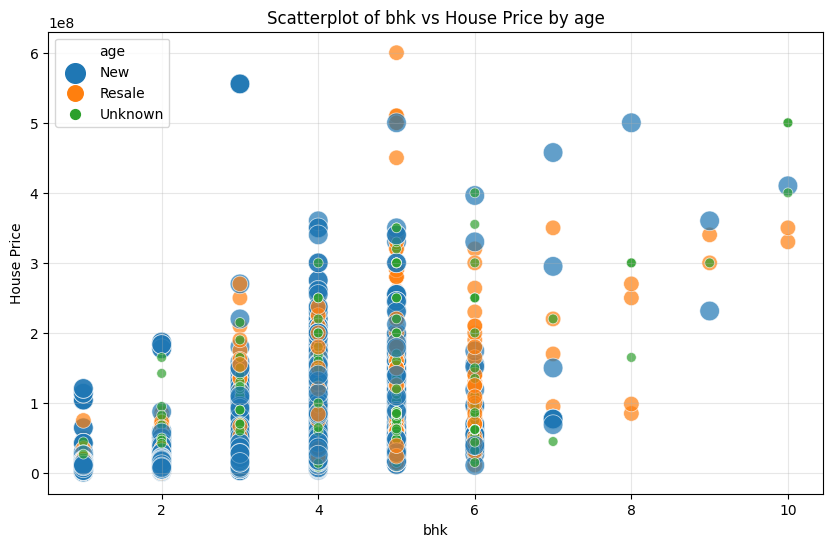

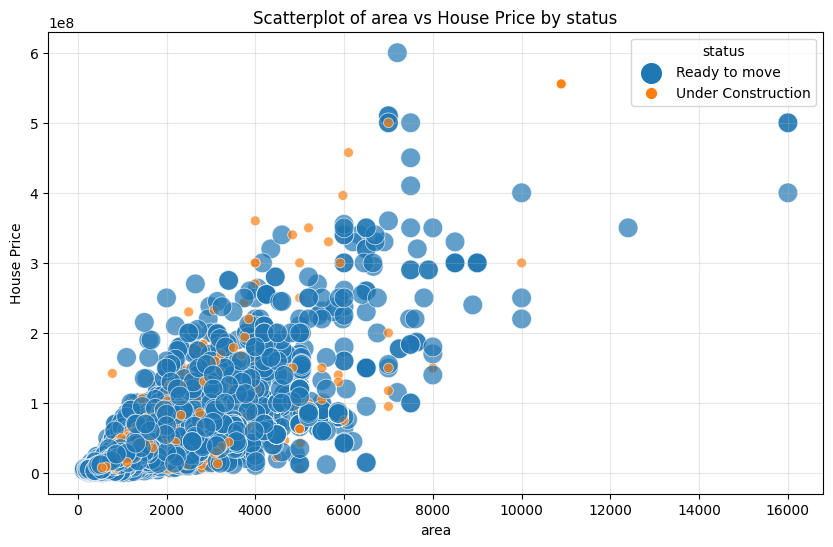

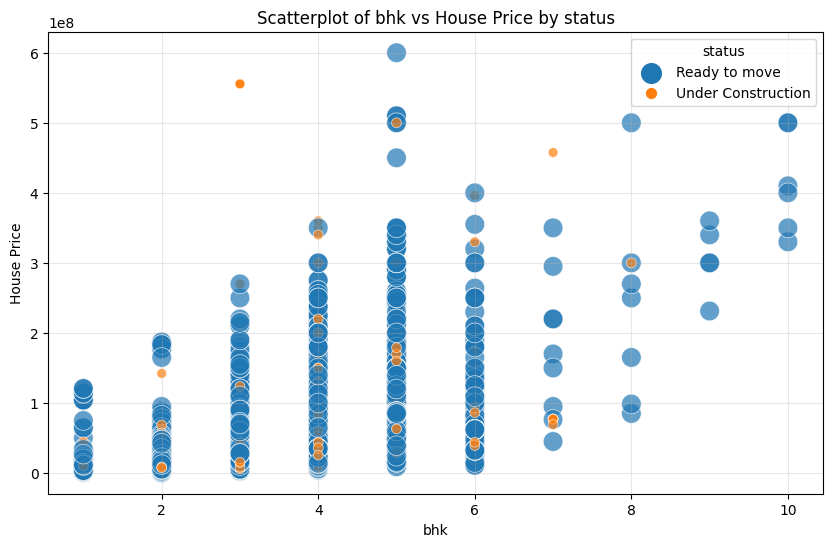

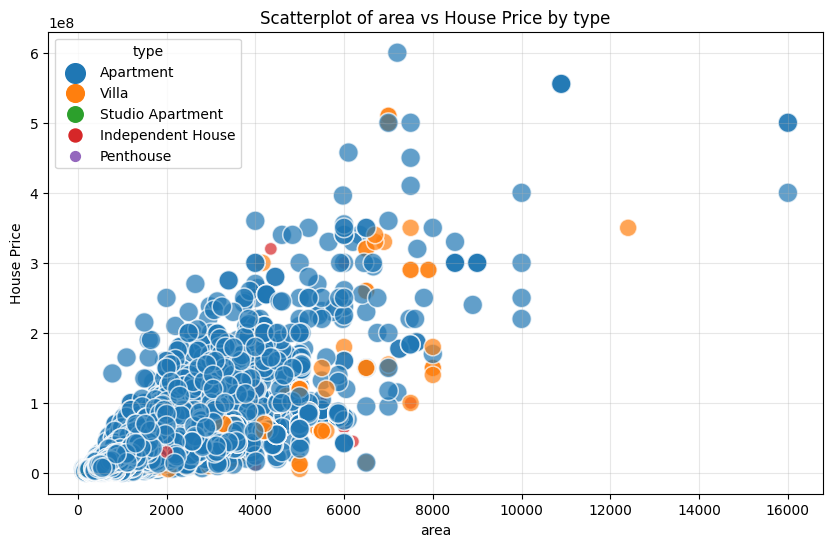

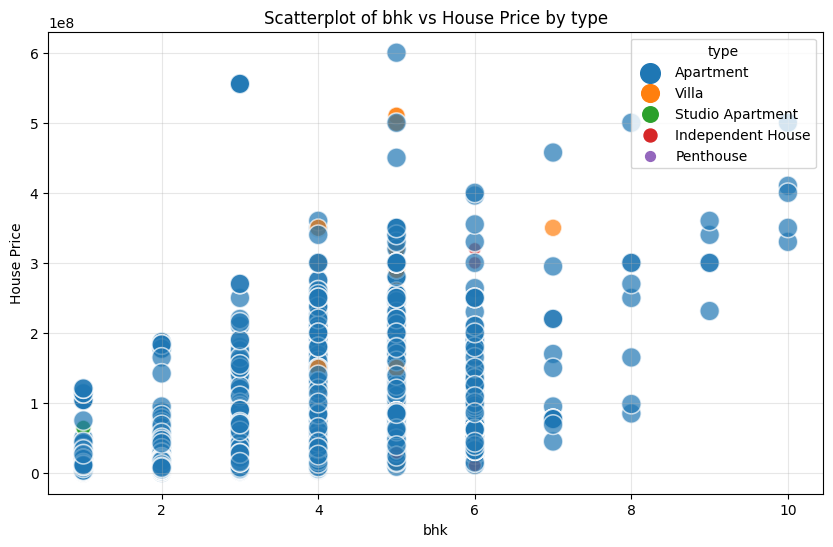

In [13]:
for j in df[["age", "status", "type"]]:
    for i in df[["area", "bhk"]]:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=i, y="house_price", hue=j, size=j, sizes=(50, 200), alpha=0.7)
        plt.title(f"Scatterplot of {i} vs House Price by {j}")
        plt.xlabel(i)
        plt.ylabel("House Price")
        plt.legend(title=j)
        plt.grid(True, alpha=0.3)
        plt.show()

The scatter plots of "bhk" vs. "house price" and "area" vs. "house price" exhibit a noticeable linear relationship, suggesting that both the number of bedrooms, hall, and kitchen (bhk) and the size of the property (area) have a direct impact on the variation in house prices.

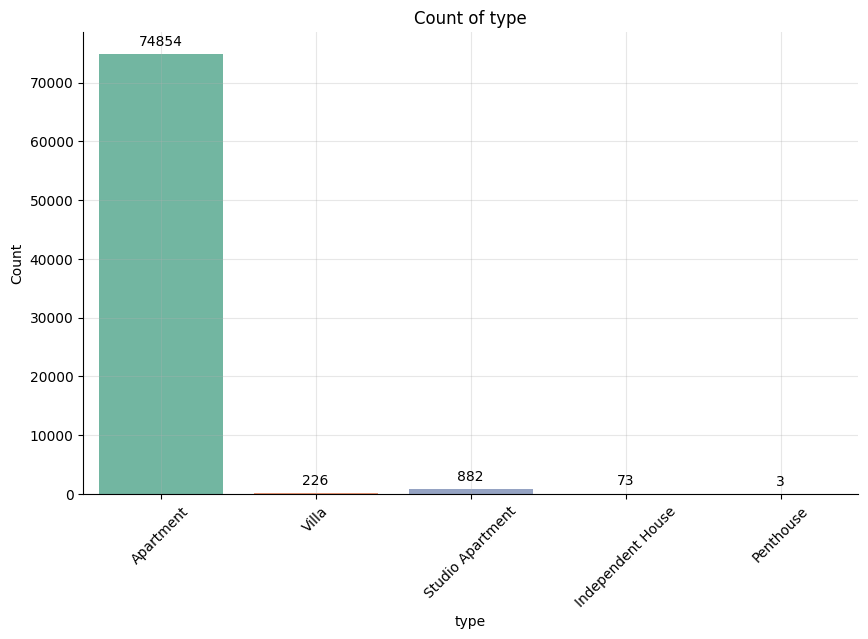

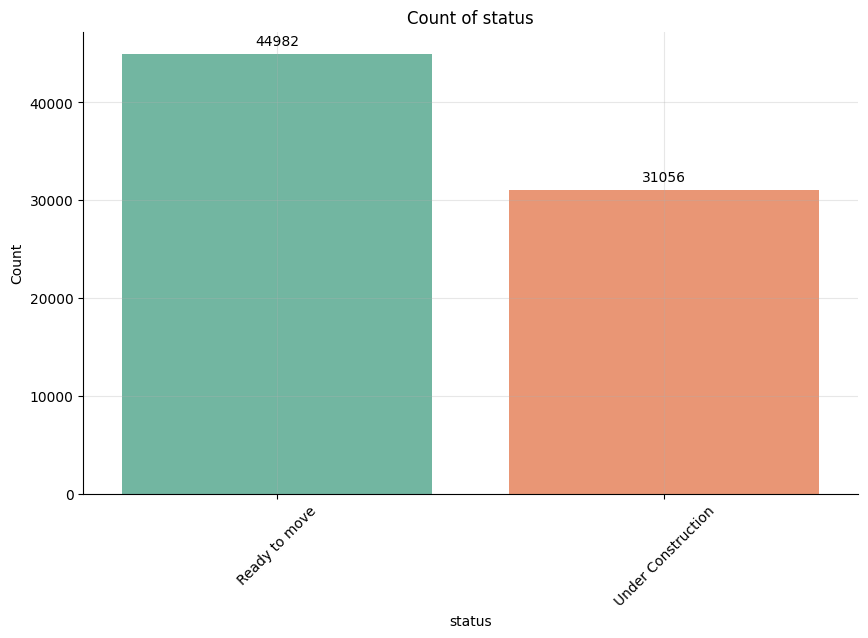

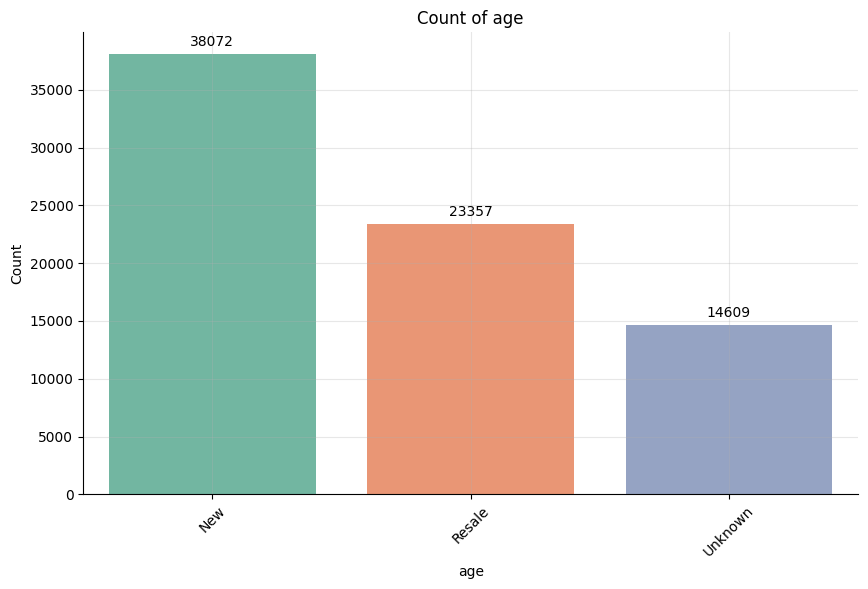

In [14]:
custom_palette = sns.color_palette("Set2")

for column in df.columns:
    if df[column].nunique() < 10 and df[column].dtype == 'object':
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=df, x=column, palette=custom_palette)
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 9), 
                        textcoords='offset points')
        plt.xticks(rotation=45)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Count of {column}')
        plt.grid(True, alpha=0.3)
        sns.despine()
        plt.show()

Among the property types, "Apartment" dominates with nearly 75,000 properties, and a significant majority are categorized as "Ready to move." Additionally, the majority of properties are classified as "New," indicating a trend toward newly constructed units.

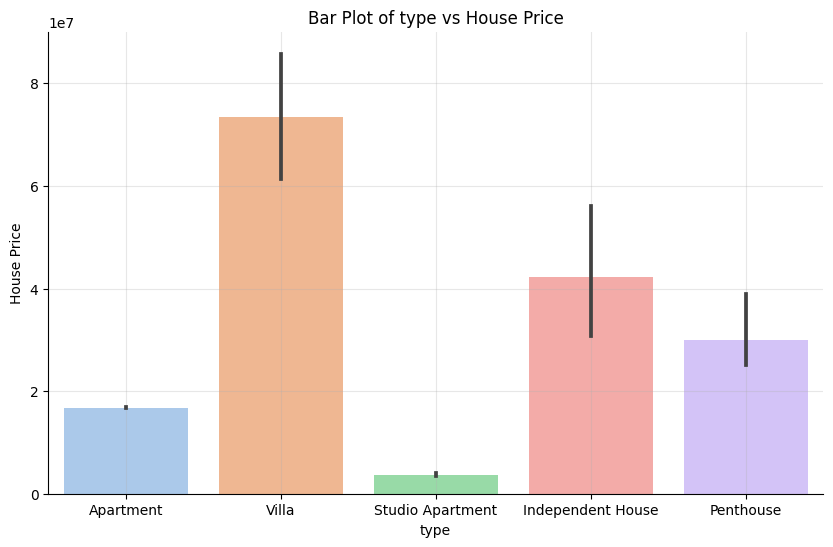

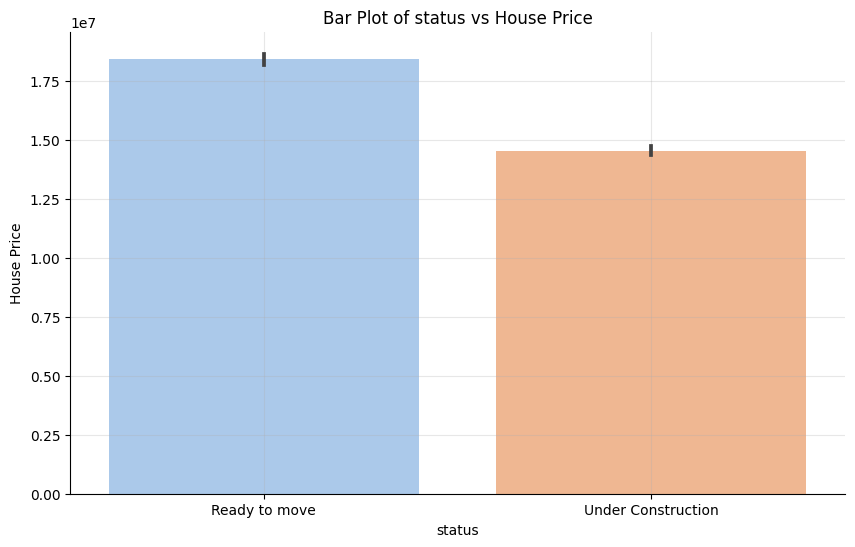

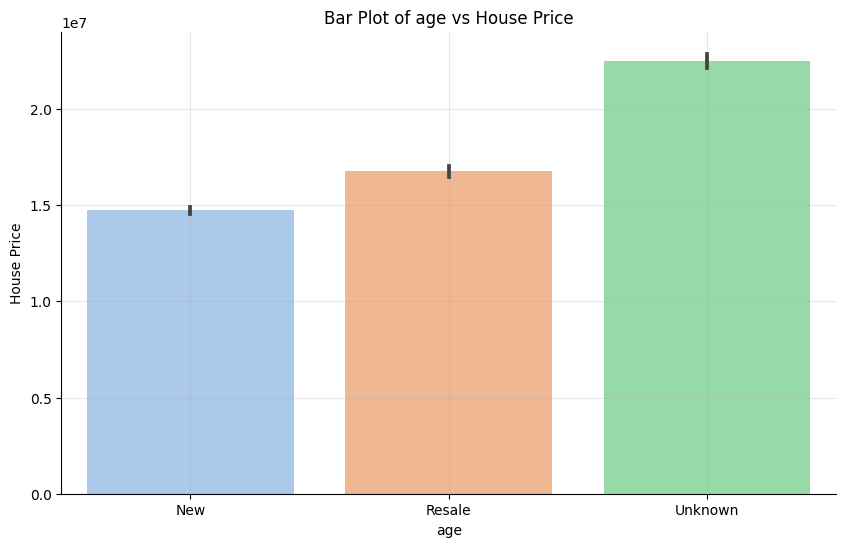

In [15]:
custom_palette = sns.color_palette("pastel")

for column in df.columns:
    if df[column].nunique() < 10 and df[column].dtype == 'object':
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=column, y="house_price", palette=custom_palette)
        plt.xlabel(column)
        plt.ylabel("House Price")
        plt.title(f"Bar Plot of {column} vs House Price")
        sns.despine()
        plt.grid(True, alpha=0.3)
        plt.show()

Villa properties tend to have higher prices, while interestingly, "Independent House" properties command higher prices than "Penthouse" units. Additionally, properties categorized as "Ready to move" exhibit higher prices, aligning with the expectation of increased convenience. Notably, properties with an "Unknown" age, followed by "Resale" and "New" properties in descending order, display varying price ranges, with newer properties generally occupying the lower end of the price spectrum.

In [16]:
df

,bhk,type,locality,area,region,status,age,house_price
0,3,Apartment,Lak And Hanware The Residency Tower,685,Andheri West,Ready to move,New,25000000
1,2,Apartment,Radheya Sai Enclave Building No 2,640,Naigaon East,Under Construction,New,5251000
2,2,Apartment,Romell Serene,610,Borivali West,Under Construction,New,17300000
3,2,Apartment,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,5998000
4,2,Apartment,Origin Oriana,659,Mira Road East,Under Construction,New,9411000
...,...,...,...,...,...,...,...,...
76033,3,Apartment,Parinee Liva Roca,1527,Juhu,Ready to move,Unknown,70000000
76034,5,Apartment,Parinee Liva Roca,3049,Juhu,Ready to move,Unknown,120000000
76035,4,Apartment,Lodha Seaview,3313,Napeansea Road,Ready to move,Unknown,100000000
76036,2,Apartment,Hubtown Serene,1305,Bandra East,Ready to move,Unknown,42500000


In [17]:
for i in df.columns:
    uni = df[i].unique()
    cou = len(uni)
    print(f"Column:{i}")
    print(f"Unique values:{uni}")
    print(f"Total count:{cou}\n")

Column:bhk
Unique values:[ 3  2  5  1  4  6  9  8 10  7]
Total count:10

Column:type
Unique values:['Apartment' 'Villa' 'Studio Apartment' 'Independent House' 'Penthouse']
Total count:5

Column:locality
Unique values:['Lak And Hanware The Residency Tower' 'Radheya Sai Enclave Building No 2'
 'Romell Serene' ... 'Ahuja Prasadam Phase III' 'HBS Marineview'
 'Hubtown Serene']
Total count:9782

Column:area
Unique values:[ 685  640  610 ... 1974 1634 3049]
Total count:2331

Column:region
Unique values:['Andheri West' 'Naigaon East' 'Borivali West' 'Panvel' 'Mira Road East'
 'Parel' 'Boisar' 'Santacruz East' 'Badlapur East' 'Fort' 'Badlapur West'
 'Khopoli' 'Chembur' 'Jogeshwari West' 'Vasai' 'Kalamboli' 'Powai'
 'Ghansoli' 'Thane West' 'Vikhroli' 'Bhiwandi' 'Airoli' 'Ambernath West'
 'Borivali East' 'Virar' 'Kharghar' 'Ulwe' 'Kamothe' 'Jogeshwari East'
 'Mulund West' 'Palghar' 'Goregaon West' 'Taloja' 'Rasayani'
 'Ghatkopar East' 'Ulhasnagar' 'Dombivali' 'Kewale' 'Nala Sopara'
 'Goregaon Ea

The dataset contains 76,038 rows and features with no columns having unique values count exceeding 10,000, indicating a diverse dataset with substantial variation within each column.

<AxesSubplot: >

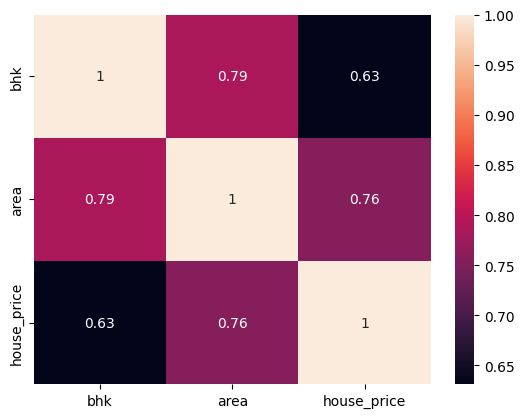

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

The correlation matrix reveals strong positive relationships between "bhk" and both "area" (0.79) and "house_price" (0.63). Similarly, "area" and "house_price" demonstrate a notable positive correlation of 0.76, highlighting the interplay between property size and price in the dataset.

In [19]:
for i in df[["bhk","type","status", "age"]]:
    for j in df[["area", "house_price"]]:
        print(df.groupby(i)[j].mean(),"\n")

bhk
1       582.96
2       912.65
3     1,436.00
4     2,426.81
5     4,248.90
6     3,965.51
7     5,033.19
8     6,085.62
9     6,670.00
10   11,366.67
Name: area, dtype: float64 

bhk
1      6,277,059.25
2     13,239,565.14
3     27,044,115.74
4     53,533,248.34
5    103,426,402.63
6    102,483,108.09
7    158,337,500.00
8    246,062,500.00
9    306,260,000.00
10   415,000,000.00
Name: house_price, dtype: float64 

type
Apartment           1,023.16
Independent House   2,252.44
Penthouse           2,143.33
Studio Apartment      393.33
Villa               3,534.00
Name: area, dtype: float64 

type
Apartment           16,800,434.44
Independent House   42,207,712.32
Penthouse           30,000,000.00
Studio Apartment     3,730,503.38
Villa               73,336,477.87
Name: house_price, dtype: float64 

status
Ready to move        1,155.12
Under Construction     835.40
Name: area, dtype: float64 

status
Ready to move        18,424,232.88
Under Construction   14,549,729.12
Name: house_pr

1) The number of bedrooms, hall, and kitchen (bhk) is positively correlated with both property area and house price. Larger bhk values correspond to higher area and price.
2) Property type significantly influences these metrics. "Villa" properties boast the highest mean area and house price, while "Studio Apartments" have the smallest area and relatively lower prices.
3) "Ready to move" properties exhibit larger mean area and higher house prices compared to properties "Under Construction."
4) Interestingly, properties with "Unknown" ages have the largest mean area, but "New" properties surprisingly command lower prices compared to "Resale" properties, emphasizing the nuanced interplay between age and pricing dynamics.
5) These insights provide essential context for developing a robust machine learning model to predict Mumbai house prices, integrating features that influence property valuation.

In [20]:
df.duplicated().sum()

20312

In [21]:
df.duplicated(subset=None, keep="first").groupby(df["type"]).sum()

type
Apartment            20072
Independent House       14
Penthouse                0
Studio Apartment       154
Villa                   72
dtype: int64

The reason why we're not removing duplicated rows, especially in the "Apartment" type, is because these duplicates represent properties that are very similar to each other, like apartments in the same building. These apartments often have the same features and prices. If we removed these duplicates, we'd lose important information about how apartments in the same building are priced. So, keeping these duplicates helps us understand better how property clusters influence prices.

# BASE MODEL SELECTION & TRAINING

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import LeaveOneOutEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.metrics import *

In [11]:
x=df.drop("house_price", axis=1)
y=df["house_price"]

In [12]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.25, random_state=11)

In [13]:
train_num = train_x.select_dtypes(include="number")
train_cat = train_x.select_dtypes(include="object")

test_num = test_x.select_dtypes(include="number")
test_cat = test_x.select_dtypes(include="object")

In our data preprocessing strategy, we'll employ one-hot encoding for categorical columns like "type," "status," and "age" since they have a limited number of unique values. For columns with a substantial number of unique values, such as "locality" and "region," we'll opt for LeaveOneOutEncoder to capture potential correlations between these categorical features and the target variable while minimizing dimensionality. This tailored approach ensures efficient representation of both common and diverse categorical data in our predictive modeling.

In [14]:
one = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
lea = LeaveOneOutEncoder()

In [15]:
train_one = train_cat[["type", "status", "age"]]
test_one = test_cat[["type", "status", "age"]]

In [16]:
train_lea = train_cat[["locality", "region"]]
test_lea = test_cat[["locality", "region"]]

In [17]:
one.fit(train_one)
train_one = pd.DataFrame(one.transform(train_one), columns=one.get_feature_names_out())
test_one = pd.DataFrame(one.transform(test_one), columns=one.get_feature_names_out())

In [18]:
lea.fit(train_lea, train_y)
train_lea = pd.DataFrame(lea.transform(train_lea), columns=lea.get_feature_names_out())
test_lea = pd.DataFrame(lea.transform(test_lea), columns=lea.get_feature_names_out())

In [19]:
train_one.reset_index(inplace = True, drop = True)
train_lea.reset_index(inplace = True, drop = True)
test_one.reset_index(inplace = True, drop = True)
test_lea.reset_index(inplace = True, drop = True)

In [20]:
train_cat = pd.concat([train_one, train_lea], axis=1)
test_cat = pd.concat([test_one, test_lea], axis=1)

In [21]:
train_num.reset_index(inplace=True, drop=True)
test_num.reset_index(inplace=True, drop=True)

In [22]:
train_x1 = pd.concat([train_num, train_cat], axis=1)
test_x1 = pd.concat([test_num, test_cat], axis=1)

In [23]:
sta=StandardScaler()
sta.fit(train_x1)
train_x1 = pd.DataFrame(sta.transform(train_x1), columns=train_x1.columns)
test_x1 = pd.DataFrame(sta.transform(test_x1), columns=test_x1.columns)

In [24]:
train_x1

,bhk,area,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,status_Ready to move,status_Under Construction,age_New,age_Resale,age_Unknown,locality,region
0,1.07,0.48,0.13,-0.03,-0.01,-0.11,-0.06,0.83,-0.83,1.00,-0.67,-0.49,0.30,0.18
1,1.07,0.33,0.13,-0.03,-0.01,-0.11,-0.06,0.83,-0.83,-1.00,-0.67,2.06,0.07,0.22
2,1.07,0.27,0.13,-0.03,-0.01,-0.11,-0.06,0.83,-0.83,-1.00,-0.67,2.06,0.00,0.18
3,1.07,-0.58,0.13,-0.03,-0.01,-0.11,-0.06,-1.21,1.21,1.00,-0.67,-0.49,-0.17,0.22
4,-0.01,-0.04,0.13,-0.03,-0.01,-0.11,-0.06,0.83,-0.83,1.00,-0.67,-0.49,-0.54,-0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57023,-1.10,-0.90,0.13,-0.03,-0.01,-0.11,-0.06,-1.21,1.21,1.00,-0.67,-0.49,-0.15,0.01
57024,-1.10,-0.78,0.13,-0.03,-0.01,-0.11,-0.06,0.83,-0.83,-1.00,1.50,-0.49,0.00,0.57
57025,-0.01,0.04,0.13,-0.03,-0.01,-0.11,-0.06,0.83,-0.83,-1.00,1.50,-0.49,0.67,0.05
57026,-1.10,-1.07,0.13,-0.03,-0.01,-0.11,-0.06,-1.21,1.21,1.00,-0.67,-0.49,-0.68,-0.36


In [25]:
test_x1

,bhk,area,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,status_Ready to move,status_Under Construction,age_New,age_Resale,age_Unknown,locality,region
0,-0.01,0.48,0.13,-0.03,-0.01,-0.11,-0.06,0.83,-0.83,1.00,-0.67,-0.49,-0.56,-0.81
1,2.15,0.74,0.13,-0.03,-0.01,-0.11,-0.06,-1.21,1.21,-1.00,-0.67,2.06,-0.12,0.57
2,-0.01,0.08,0.13,-0.03,-0.01,-0.11,-0.06,0.83,-0.83,-1.00,1.50,-0.49,-0.61,-0.76
3,-0.01,-0.11,0.13,-0.03,-0.01,-0.11,-0.06,-1.21,1.21,1.00,-0.67,-0.49,-0.19,0.25
4,-1.10,-0.61,0.13,-0.03,-0.01,-0.11,-0.06,0.83,-0.83,-1.00,1.50,-0.49,0.21,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19005,1.07,1.52,0.13,-0.03,-0.01,-0.11,-0.06,-1.21,1.21,-1.00,-0.67,2.06,0.63,0.94
19006,1.07,0.93,0.13,-0.03,-0.01,-0.11,-0.06,0.83,-0.83,-1.00,-0.67,2.06,0.23,0.22
19007,1.07,0.97,0.13,-0.03,-0.01,-0.11,-0.06,0.83,-0.83,-1.00,1.50,-0.49,-0.27,-0.23
19008,-1.10,-0.63,0.13,-0.03,-0.01,-0.11,-0.06,0.83,-0.83,-1.00,1.50,-0.49,-0.40,0.22


In [26]:
train_x1.isnull().sum().sum()

0

In [27]:
test_x1.isnull().sum().sum()

0

In [28]:
lin = LinearRegression()
dec = DecisionTreeRegressor()
ran = RandomForestRegressor()
ada = AdaBoostRegressor()
gra = GradientBoostingRegressor()
knn = KNeighborsRegressor()
xre = XGBRegressor()
xrf = XGBRFRegressor()

In [29]:
def train_model(model):
    model.fit(train_x1, train_y)
    pred=model.predict(test_x1)
    
    print(model.__class__.__name__)
    print("")
    print("Train score:", model.score(train_x1, train_y))
    print("Test score:", model.score(test_x1, test_y))
    print("")
    print("Mean absolute error:", mean_absolute_error(pred, test_y))
    print("Mean squared error:", mean_squared_error(pred, test_y))
    print("R2 score:", r2_score(pred, test_y))
    print("\n","="*50, "\n")

In [30]:
for model in [lin, dec, ran, ada, gra, knn, xre, xrf]:
    train_model(model)

LinearRegression

Train score: 0.8343176338241268
Test score: 0.7794788899682039

Mean absolute error: 4664635.977269115
Mean squared error: 103265317730735.55
R2 score: 0.7042818710313472


DecisionTreeRegressor

Train score: 0.9953301229526111
Test score: 0.8706745369988054

Mean absolute error: 2063283.509759662
Mean squared error: 60560347377025.58
R2 score: 0.8648611121410432


RandomForestRegressor

Train score: 0.9867140785630331
Test score: 0.9104983144622134

Mean absolute error: 1801282.6029816465
Mean squared error: 41911724429299.65
R2 score: 0.8990110718928772


AdaBoostRegressor

Train score: -0.7051850814130383
Test score: -0.7521478192457844

Mean absolute error: 21375989.984264843
Mean squared error: 820493336168781.4
R2 score: 0.12119429044138152


GradientBoostingRegressor

Train score: 0.9332892460680152
Test score: 0.8947856094246056

Mean absolute error: 2896800.671302163
Mean squared error: 49269648021666.64
R2 score: 0.871176706202188


KNeighborsRegressor

Trai

Among the range of regression models evaluated, the RandomForestRegressor shines as the most promising candidate for hyperparameter tuning and final adoption. With a high training score of 0.986 and a commendable test score of 0.910, it demonstrates an impressive ability to generalize its predictions beyond the training data. Additionally, the model achieves relatively low errors, boasting a mean absolute error (MAE) of 18,01,282 and a mean squared error (MSE) of 4,19,11,72,44,29,299, capturing its accuracy in predicting house prices. The R2 score of 0.899 further reinforces its strong fit to the data. Its robustness to overfitting, ensemble nature, and potential for fine-tuning through hyperparameter optimization bolster its position as the ideal model for accurately forecasting house prices within this dataset.

# HYPERPARAMETER TUNING

In [250]:
params = {'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]}

rf=RandomForestRegressor(random_state=11)
ran1 = RandomizedSearchCV(rf, params, cv=5, n_jobs=1, verbose=2, scoring="neg_mean_absolute_error")
ran1.fit(train_x1, train_y)

print(ran1.best_params_)
print(-(ran1.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time= 3.1min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time= 3.1min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time= 3.1min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time= 3.1min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time= 3.0min
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time= 1.9min
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; to

The parameter values obtained from RandomizedSearchCV for the RandomForestRegressor are as follows: 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, and 'bootstrap': False. These parameter values are determined through a randomized search process that explores different combinations to find the ones that result in the best model performance. By using these optimal parameters, we expect the RandomForestRegressor to achieve an improved outcome in terms of predictive accuracy. The associated performance metric, in this case, is a mean absolute error (MAE) value of 1,699,383.74, indicating the average difference between the predicted and actual house prices. These parameter values collectively contribute to enhancing the model's ability to capture underlying patterns and relationships within the data, leading to a more accurate and reliable predictive model.

In [31]:
ranf = RandomForestRegressor(n_estimators= 300, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 30, bootstrap= False, random_state=11)
ranf.fit(train_x1, train_y)
pred=ranf.predict(test_x1)

print(ranf.__class__.__name__)
print("")
print("Train score:", ranf.score(train_x1, train_y))
print("Test score:", ranf.score(test_x1, test_y))
print("")
print("Mean absolute error:", mean_absolute_error(pred, test_y))
print("Mean squared error:", mean_squared_error(pred, test_y))
print("R2 score:", r2_score(pred, test_y))

RandomForestRegressor

Train score: 0.9889633193960378
Test score: 0.9238157093455011

Mean absolute error: 1756150.4580484668
Mean squared error: 35675473334018.664
R2 score: 0.9117726127954296


In [32]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(ranf, train_x1, train_y, cv=5)
cv_mean = cv_scores.mean()
print(f"Cross-Validation Mean Score: {cv_mean:.4f}")

Cross-Validation Mean Score: 0.9224


In [33]:
y_true = np.array([test_y])
y_pred = np.array([pred])

mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 9.66%


# FEATURE SELECTION

In [34]:
cat=df.select_dtypes(include="object")
num=df.select_dtypes(include="number")
target = df["house_price"]

In [35]:
cat=pd.DataFrame(lea.fit_transform(cat, target), columns=lea.get_feature_names_out())

In [36]:
df00 = pd.concat([cat, num], axis=1)
df00 = pd.DataFrame(sta.fit_transform(df00), columns=df00.columns)

<AxesSubplot: >

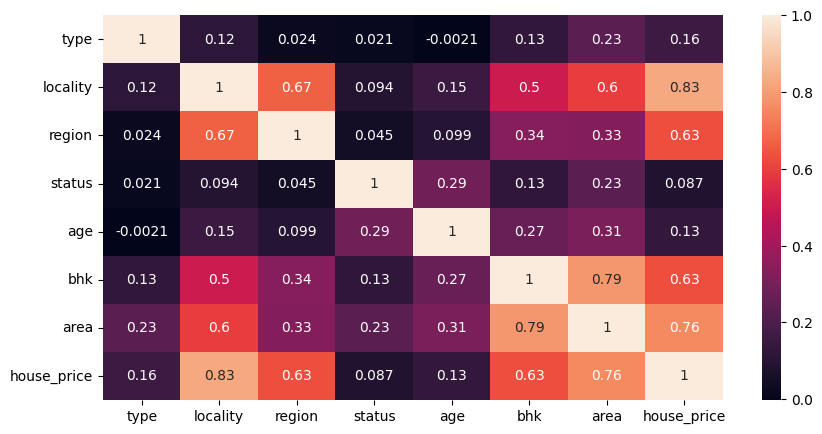

In [37]:
plt.figure(figsize=(10,5))
sns.heatmap(df00.corr(), annot=True)

Based on the correlation matrix, it appears that the "type" feature has relatively low correlations with the other features in the dataset. Correlation values closer to 0 suggest weaker linear relationships between variables. Since "type" has correlations ranging from -0.0021 to 0.23 with the other features, it indicates that there isn't a strong linear dependency between "type" and the other characteristics like "locality," "region," "status," "age," "bhk," "area," and "house_price." As a result, dropping the "type" column is a reasonable decision, as it is less likely to contribute significantly to the model's predictive power. By removing this feature, we can potentially simplify the model without compromising its overall performance.

# MODEL TRAINING AND EVALUATION

In [38]:
xx = df.drop(["house_price","type"], axis=1)
yy = df["house_price"]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size=0.25, random_state=11)

In [40]:
cat_train = x_train.select_dtypes(include="object")
num_train = x_train.select_dtypes(include="number")

cat_test = x_test.select_dtypes(include="object")
num_test = x_test.select_dtypes(include="number")

In [41]:
leave = LeaveOneOutEncoder()
leave.fit(cat_train, y_train)

cat_train = pd.DataFrame(leave.transform(cat_train), columns=leave.get_feature_names_out())
cat_test = pd.DataFrame(leave.transform(cat_test), columns=leave.get_feature_names_out())

In [42]:
cat_train.reset_index(inplace=True, drop=True)
cat_test.reset_index(inplace=True, drop=True)
num_train.reset_index(inplace=True, drop=True)
num_test.reset_index(inplace=True, drop=True)

In [43]:
x1_train = pd.concat([num_train, cat_train], axis=1)
x1_test = pd.concat([num_test, cat_test], axis=1)

In [44]:
standard = StandardScaler()
standard.fit(x1_train)

x1_train = pd.DataFrame(standard.transform(x1_train), columns=x1_train.columns)
x1_test = pd.DataFrame(standard.transform(x1_test), columns=x1_test.columns)

In [45]:
print(x1_train.isnull().sum().sum())
print(x1_test.isnull().sum().sum())

0
0


In [46]:
rforest = RandomForestRegressor(n_estimators= 300, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 30, bootstrap= False, random_state=11)
rforest.fit(x1_train, y_train)
pred_rf=rforest.predict(x1_test)

print(rforest.__class__.__name__)
print("")
print("Train score:", rforest.score(x1_train, y_train))
print("Test score:", rforest.score(x1_test, y_test))
print("")
print("Mean absolute error:", mean_absolute_error(pred_rf, y_test))
print("Mean squared error:", mean_squared_error(pred_rf, y_test))
print("R2 score:", r2_score(pred_rf, y_test))

RandomForestRegressor

Train score: 0.9896865665991987
Test score: 0.9242163215702954

Mean absolute error: 1737664.6201910945
Mean squared error: 35487875200333.21
R2 score: 0.913688542004785


# CONCLUSION

In conclusion, our project aimed to predict house prices using a comprehensive approach that encompassed data preprocessing, model selection, hyperparameter tuning, and feature analysis. Through extensive exploratory data analysis, we identified the most suitable preprocessing techniques for our data, employing LeaveOneOut Encoder for categorical features and Standard Scaler for numerical ones. After evaluating multiple regression models, we found the RandomForestRegressor to be the most promising candidate due to its ability to handle complex relationships within the dataset.

To optimize the performance of the RandomForestRegressor, we conducted hyperparameter tuning using techniques like RandomizedSearchCV, resulting in the selection of the best hyperparameters. These parameters were tailored to achieve optimal predictive accuracy and generalization ability. Furthermore, guided by the correlation matrix, we decided to drop the "type" feature, as it demonstrated limited correlation with other features and the target variable.

Upon finalizing the model configuration, we trained the RandomForestRegressor on the preprocessed data. The model's performance on the training set yielded a score of 98.97%, and on the test set, it achieved a score of 92.42%. These metrics indicate that the model is well-balanced and can generalize effectively to new, unseen data. The Mean Absolute Error of approximately 1,737,664.62 and the Mean Squared Error of around 35,487,875,200,333.21 further attest to the model's strong predictive capabilities. With an R2 score of 91.37%, the model explains a substantial portion of the variance in the target variable.

Overall, our project demonstrates that a meticulous approach to data preprocessing, thoughtful model selection, and thorough parameter tuning can result in a robust predictive model for house price estimation. This model holds the potential to provide valuable insights and aid in making informed decisions within the real estate domain.